In [268]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
import matplotlib.pyplot as plt 
import numpy as np

In [269]:
with MPRester("XWkv843w7d9S0lue") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-7958")

# 1) Bande interdite

In [270]:
bandgap = bandstructure.get_band_gap()
bande_dir=bandgap.get('direct')
energie= bandgap.get('energy')
transition=bandgap.get('transition')
#print(energie)

# 2)  Dispersions

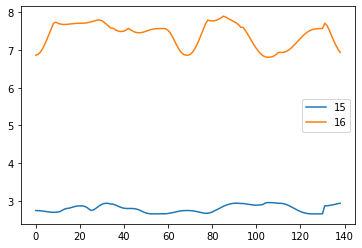

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

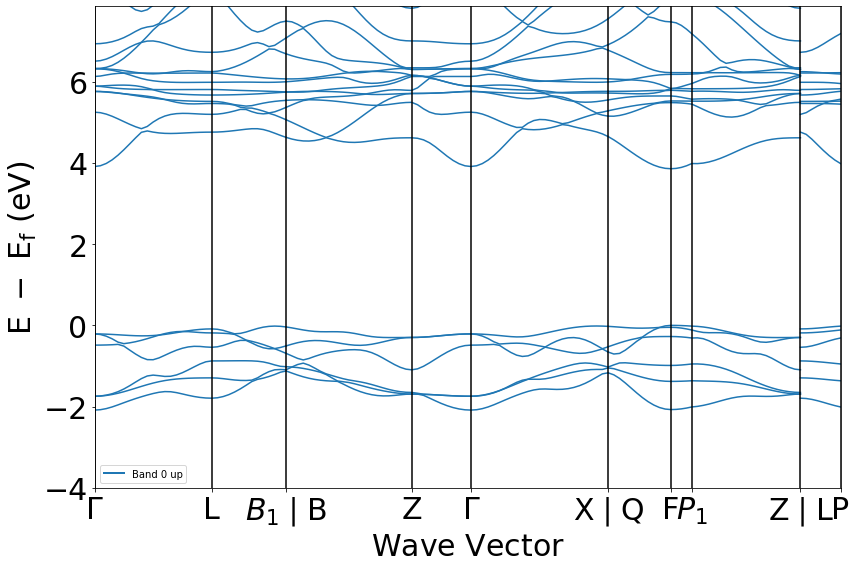

In [271]:
plotter = BSPlotter(bandstructure)
data = plotter.bs_plot_data()

indice_bande_val = list(bandstructure.get_vbm()['band_index'].values())[0]
indice_bande_conduct = list(bandstructure.get_cbm()['band_index'].values())[0]
bandvalues15 = list(bandstructure.bands.values())[0][15]
bandvalues16 = list(bandstructure.bands.values())[0][16]

v=np.arange(0,139)
plt.plot(v, bandvalues15, label='15')
plt.plot(v, bandvalues16, label='16')
plt.legend()
plt.show()

#graphe identique à celui sur Materials Project
plotter.get_plot()

In [276]:
#calcul des énergies sur chaque bande
energy16 = []
energy15 = []
for i in range(9) : 
    energy16.append(data['energy']['1'][i][16])
    energy15.append(data['energy']['1'][i][15])
    
#calcul des dispersions 
dispersions15 = [] 
dispersions16 = [] 
distances = data['distances']
for i in range(len(distances)) : 
    delta = abs(distances[i][-1]-distances[i][0])
    dispersions15.append(abs(energy15[i][-1]-energy15[i][0])/delta)
    dispersions16.append(abs(energy16[i][-1]-energy16[i][0])/delta)
    
#Détermination de l'index dans la liste dispersions15 qui comprend la plus grande et la plus petite dispersions
indexmax15 = dispersions15.index(max(dispersions15))
indexmin15 = dispersions15.index(min(dispersions15))

#Détermination de l'index dans la liste dispersions16 qui comprend la plus grande et la plus petite dispersions
indexmax16 = dispersions16.index(max(dispersions16))
indexmin16 = dispersions16.index(min(dispersions16))




#Code utilisé pour créer la figure présente ci-dessous

#plotter.get_plot()
#plt.scatter(distances[indexmax15][0], energy15[indexmax15][0], c='m')
#plt.scatter(distances[indexmax15][-1], energy15[indexmax15][-1], c='m')
#plt.scatter(distances[indexmin15][0], energy15[indexmin15][0], c='g')
#plt.scatter(distances[indexmin15][-1], energy15[indexmin15][-1], c='g')
#plt.scatter(distances[indexmax16][0], energy16[indexmax16][0], c='m')
#plt.scatter(distances[indexmax16][-1], energy16[indexmax16][-1], c='m')
#plt.scatter(distances[indexmin16][0], energy16[indexmin16][0], c='g')
#plt.scatter(distances[indexmin16][-1], energy16[indexmin16][-1], c='g')

#Pour tracer les flèches, j'ai fait une capture d'écran sur laquelle j'ai rajouté les flèches.

Les flèches mauves représentent la direction de la plus grande dispersion et les vertes de la plus petite dispersion sur chacune des deux bandes. La bande de valence est la bande où l'énergie est la plus faible tandis que la bande de conduction a une énergie beaucoup plus importante. 

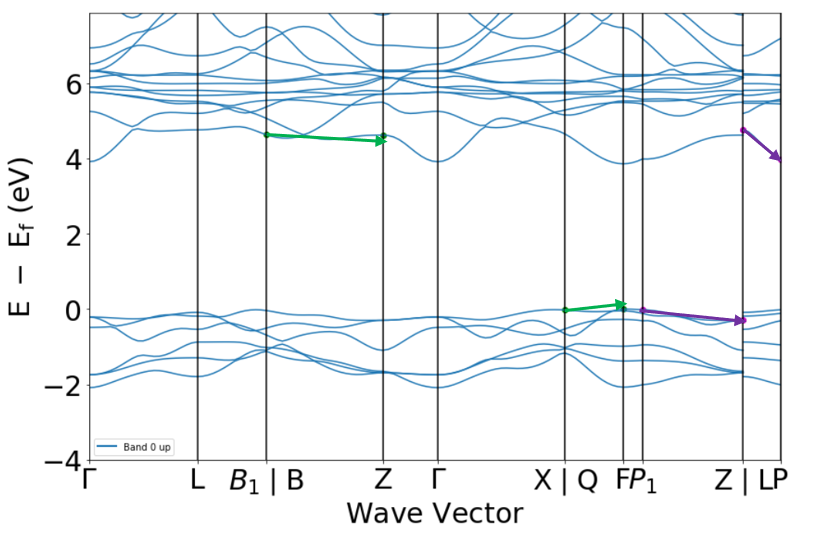

# 3) Masse effective

In [273]:
#calcul du sommet de la bande de valence
x_max_bande_val=data.get('vbm')[0][0]
y_max_bande_val=data.get('vbm')[0][1]

#calcul du bas de la bande de conduction
x_min_bande_con=data.get('cbm')[0][0]
y_min_bande_con=data.get('cbm')[0][1]

#calcul des index dans la liste distances correspondants au sommet et au bas de la bande de valence et de conduction
for i in range(9):
    if distances[i][-1]==x_max_bande_val:
        index_vbm=i
    if distances[i][0]==x_min_bande_con:
        index_cbm=i


Pour le calcul de la masse effective, on utilise: 
$$m^* = \hbar^2\left(\frac{\partial^2E}{\partial k^2}\right)^{-1} ,$$
où E(k) est un polymôme du second degré, c'est-à-dire que $E(k) = ak^2 + bk + c$

Autrement dit, $$m^* = \frac{\hbar^2}{2a} $$
A présent, nous devons déterminer les trois constantes a,b,c. Pour ce faire, nous allons utiliser l'interpolation de la fonction polyfit.

In [274]:
#Bande de valence
x_vbm=[distances[index_vbm][-2],distances[index_vbm][-1],distances[index_vbm+1][1]]
y_vbm=[energy15[index_vbm][-2],energy15[index_vbm][-1],energy15[index_vbm+1][1]]
cst_v=np.polyfit(x_vbm,y_vbm,2)
masse_eff_vbm =  ((pow( (6.62607015*(10)**(-34))/(2*np.pi),2))/(2*cst_v[0])/1.602176634)*10**39 
print(masse_eff_vbm)

#Bande de conduction 
x_cbm=[distances[index_cbm][-2],distances[index_cbm][-1],distances[index_cbm+1][1]]
y_cbm=[energy16[index_cbm][-2],energy16[index_cbm][-1],energy16[index_cbm+1][1]]
cst_c=np.polyfit(x_cbm,y_cbm,2)
masse_eff_cbm =  ((pow( (6.62607015*(10)**(-34))/(2*np.pi),2))/(2*cst_c[0])/1.602176634)*10**39
print(masse_eff_cbm)

-1.0786401814790728e-30
-2.4999784391635623e-31


Dans le calcul de la massse, il y a deux facteurs en plus: le $$10^{20}   \   et   \   \frac{10^{19}}{1.602176634}$$. Le premier terme vient de la conversion m en Å  car $$1m =10^{10} Å$$. Il ne faut pas oublier que ce terme est élévé au carré, c'est pour cela que nous obtenons bien  $$10^{20}$$ Le deuxième facteur est engendré par la conversion J en eV. En effet, $$1J = \frac{10^{19}}{1.602176634} eV$$